Matplotlib is building the font cache; this may take a moment.
<ipython-input-1-8dd154ad3961>:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


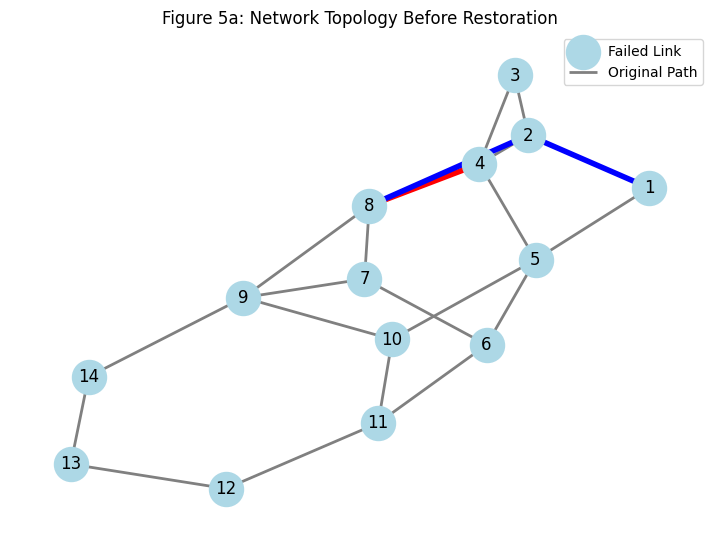

Saved before-restoration figure to /drive/figure5a_network_before_restoration.png


<ipython-input-1-8dd154ad3961>:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


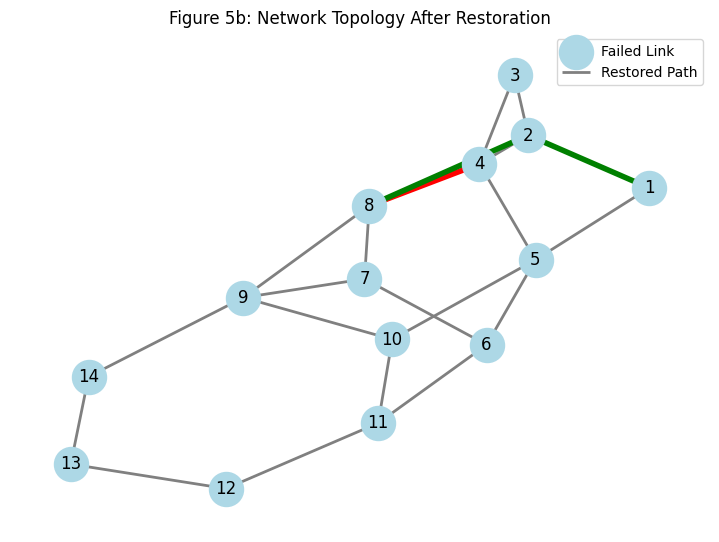

Saved after-restoration figure to /drive/figure5b_network_after_restoration.png
Original path from 1 to 8: [1, 2, 8]
Restored path from 1 to 8 (avoiding (4, 8)): [1, 2, 8]


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import os

# Define the NSFNET topology
edges = [
    (1, 2), (1, 5), (2, 3), (2, 4), (2, 8), (3, 4), (4, 5), (4, 8),
    (5, 6), (5, 10), (6, 7), (6, 11), (7, 8), (7, 9), (8, 9),
    (9, 10), (9, 14), (10, 11), (11, 12), (12, 13), (13, 14)
]
G = nx.Graph()
G.add_edges_from(edges)

# Define the failed link and source-destination pair
failed_link = (4, 8)
src, dst = 1, 8  # We want to restore connection from node 1 to node 8

# BEFORE RESTORATION: show normal path
try:
    orig_path = nx.shortest_path(G, src, dst)
except nx.NetworkXNoPath:
    orig_path = None

# AFTER RESTORATION: Remove the failed link and find a new path
G_restored = G.copy()
G_restored.remove_edge(*failed_link)
try:
    restored_path = nx.shortest_path(G_restored, src, dst)
except nx.NetworkXNoPath:
    restored_path = None

def path_edges(path):
    return [(path[i], path[i+1]) for i in range(len(path)-1)] if path is not None else []

pos = nx.spring_layout(G, seed=42)

# --- Figure 5a: Before Restoration (failed link in red, normal path in blue) ---
plt.figure(figsize=(7, 5))
nx.draw(G, pos, with_labels=True, edge_color='gray', node_color='lightblue', node_size=600, width=2)
nx.draw_networkx_edges(G, pos, edgelist=[failed_link], edge_color='red', width=4, label='Failed Link')
if orig_path:
    nx.draw_networkx_edges(G, pos, edgelist=path_edges(orig_path), edge_color='blue', width=4, label='Original Path')
plt.title("Figure 5a: Network Topology Before Restoration")
plt.legend(["Failed Link", "Original Path"])
plt.tight_layout()
before_path = os.path.join(os.getcwd(), "figure5a_network_before_restoration.png")
plt.savefig(before_path, dpi=300)
plt.show()
print(f"Saved before-restoration figure to {before_path}")

# --- Figure 5b: After Restoration (failed link in red, restored path in green) ---
plt.figure(figsize=(7, 5))
nx.draw(G, pos, with_labels=True, edge_color='gray', node_color='lightblue', node_size=600, width=2)
nx.draw_networkx_edges(G, pos, edgelist=[failed_link], edge_color='red', width=4, label='Failed Link')
if restored_path:
    nx.draw_networkx_edges(G, pos, edgelist=path_edges(restored_path), edge_color='green', width=4, label='Restored Path')
plt.title("Figure 5b: Network Topology After Restoration")
plt.legend(["Failed Link", "Restored Path"])
plt.tight_layout()
after_path = os.path.join(os.getcwd(), "figure5b_network_after_restoration.png")
plt.savefig(after_path, dpi=300)
plt.show()
print(f"Saved after-restoration figure to {after_path}")

# Print the actual restored path
print(f"Original path from {src} to {dst}: {orig_path}")
print(f"Restored path from {src} to {dst} (avoiding {failed_link}): {restored_path}")
